In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

In [2]:
Trump_reviews = pd.read_csv('trump_data_with_senti.csv', encoding = 'utf-8')
Biden_reviews = pd.read_csv('biden_data_with_senti.csv', encoding = 'utf-8')

In [3]:
# Analyzing Positive, Negative and Neutral replies on Trump's tweets.     
new1 = Trump_reviews.groupby('Expression Label').count()
x = list(new1['Sentiment_Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))
df = pd.DataFrame(tuple_list, columns=['x','y'])
df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.update_layout(title_text='Trump\'s Reviews Analysis' )
fig.show()

/home/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [4]:
# Analyzing Positive, Negative and Neutral replies on Biden's tweets
new2 = Biden_reviews.groupby('Expression Label').count()
x = list(new2['Sentiment_Polarity'])
y = list(new2.index)
tuple_list = list(zip(x,y))
df = pd.DataFrame(tuple_list, columns=['x','y'])
df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.update_layout(title_text='Biden\'s Reviews Analysis' )
fig.show()
      

/home/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
# Dropping all the statements having zero polarity

# Donald Trump      
# reviews1 = Trump_reviews[Trump_reviews['Sentiment_Polarity'] == 0.0000]
# reviews1.shape
# cond1 = Trump_reviews['Sentiment_Polarity'].isin(reviews1['Sentiment_Polarity'])
# Trump_reviews.drop(Trump_reviews[cond1].index, inplace = True)
# Trump_reviews.shape 

In [6]:
# Joe Biden      
# reviews2 = Biden_reviews[Biden_reviews['Sentiment_Polarity'] == 0.0000]
# reviews2.shape
# cond2 = Biden_reviews['Sentiment_Polarity'].isin(reviews1['Sentiment_Polarity'])
# Biden_reviews.drop(Biden_reviews[cond2].index, inplace = True)
# Biden_reviews.shape

In [7]:
# Let's make both the datasets balanced now. So we will just take 1000 rows from both datasets and drop rest of them.

# Donald Trump      
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(Trump_reviews.index, remove_n, replace=False)
df_subset_trump = Trump_reviews.drop(drop_indices)
df_subset_trump.shape

(1676, 6)

In [8]:
# Joe biden            
np.random.seed(10)
remove_n =31
drop_indices = np.random.choice(Biden_reviews.index, remove_n, replace=False)
df_subset_biden = Biden_reviews.drop(drop_indices)
df_subset_biden.shape
 

(1969, 6)

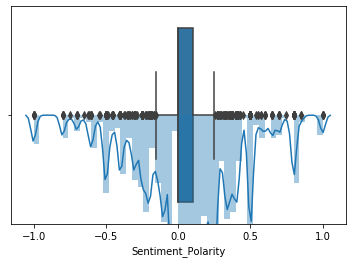

In [9]:
# Data Visualiization

# Donald Trump      
sns.distplot(df_subset_trump['Sentiment_Polarity'])
sns.boxplot([df_subset_trump.Sentiment_Polarity])
plt.show()

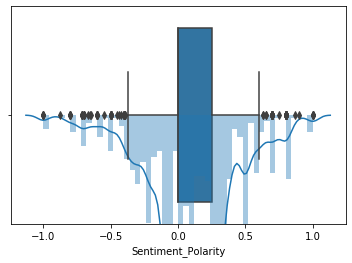

In [10]:
# Joe Biden      
sns.distplot(df_subset_biden['Sentiment_Polarity'])
sns.boxplot([df_subset_biden.Sentiment_Polarity])
plt.show()

In [11]:
# Percentage count for Donald Trump
count_1 = df_subset_trump.groupby('Expression Label').count()
print(count_1)
negative_per1 = (count_1['Sentiment_Polarity'][0]/1000)*100
positive_per1 = (count_1['Sentiment_Polarity'][1]/1000)*100
neutral_per1 = (count_1['Sentiment_Polarity'][2]/1000)*100

# Percentage count for Joe Biden      
count_2 = df_subset_biden.groupby('Expression Label').count()
print(count_2)
negative_per2 = (count_2['Sentiment_Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment_Polarity'][1]/1000)*100
neutral_per2 = (count_2['Sentiment_Polarity'][2]/1000)*100

                  Unnamed: 0  user  text  cleaned_text  Sentiment_Polarity
Expression Label                                                          
Neutral                  894   894   894           894                 894
negative                 281   281   281           281                 281
positive                 501   501   501           501                 501
                  Unnamed: 0  user  text  cleaned_text  Sentiment_Polarity
Expression Label                                                          
Neutral                  663   663   663           663                 663
negative                 354   354   354           354                 354
positive                 952   952   952           952                 952


In [12]:
# Analysis of Positive and Negative comments on both the handle

Politicians = ['Donald Trump', 'Joe Biden']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [13]:
# Most Positive and Most Negative comments on both the Twitter handles

# Donald Trump
# Most positive replies      
most_positive1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == 1].text.head()
pos_txt1 = list(most_positive1)
pos1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == 1].Sentiment_Polarity.head()
pos_pol1 = list(pos1)
fig = go.Figure(data=[go.Table(columnorder = [1,2], 
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Most Positive Replies on Trump\'s Handle'],
                               fill_color='paleturquoise',
                               align='left'),
               cells=dict(values=[pos_pol1, pos_txt1],
                               fill_color='lavender',
                               align='left'))])
 
fig.show()

# Most Negative Replies      
most_negative1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == -1].text.head()
neg_txt1 = list(most_negative1)
neg1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == -1].Sentiment_Polarity.head()
neg_pol1 = list(neg1)
fig = go.Figure(data=[go.Table(columnorder = [1,2],
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Most Negative Replies on Trump\'s handle'],
                               fill_color='paleturquoise',
                               align='left'),
                cells=dict(values=[neg_pol1, neg_txt1],
                           fill_color='lavender',
                           align='left'))])

fig.show()

In [14]:
# Joe Biden
# Most Positive replies      
most_positive2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == 1].text.tail()
pos_txt2 = list(most_positive2)
pos2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == 1].Sentiment_Polarity.tail()
pos_pol2 = list(pos2)
fig = go.Figure(data=[go.Table(columnorder = [1,2],
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Most Positive Replies on Biden\'s handle'],
                               fill_color='paleturquoise',
                               align='left'),
                cells=dict(values=[pos_pol2, pos_txt2],
                           fill_color='lavender',
                           align='left'))])

fig.show()

# Most negative replies
most_negative2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == -1].text.head()
neg_txt2 = list(most_negative2)
neg2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == -1].Sentiment_Polarity.head()
neg_pol2 = list(neg2)
fig = go.Figure(data=[go.Table(columnorder = [1,2],
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Most Negative Replies on Biden\'s handle'],
                               fill_color='paleturquoise',
                               align='left'),
                cells=dict(values=[neg_pol2, neg_txt2],
                           fill_color='lavender',
                           align='left'))])

fig.show()


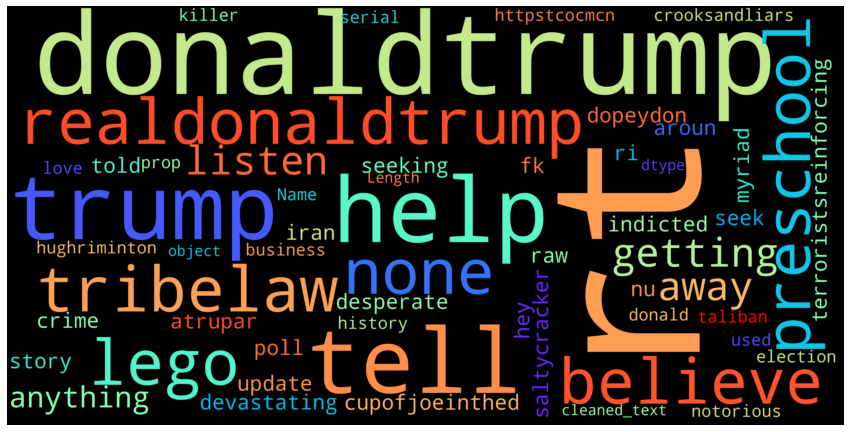

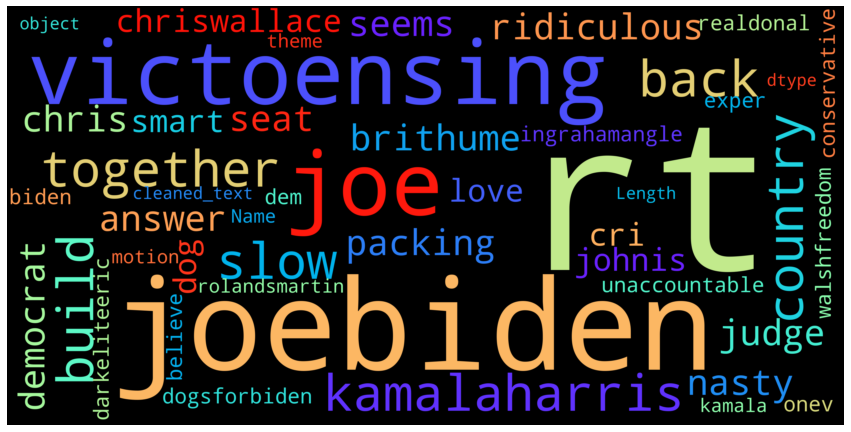

In [15]:
# WordCloud for Donald Trump      
# Start with one review:
text = str(df_subset_trump.cleaned_text)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)
# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WordCloud for Joe Biden      
# Start with one review:
text = str(Biden_reviews.cleaned_text)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(text)
# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

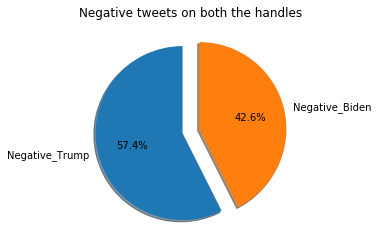

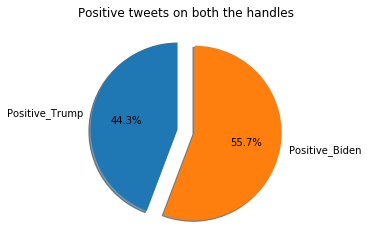

In [16]:
# Comparison between negative comments on both      
labels =  ['Negative_Trump', 'Negative_Biden'] 
sizes = lis_neg
explode = (0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Negative tweets on both the handles')
plt.show()

# Comparison between Positive comments on both      
labels =  ['Positive_Trump', 'Positive_Biden'] 
sizes = lis_pos
explode = (0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Positive tweets on both the handles')
plt.show()

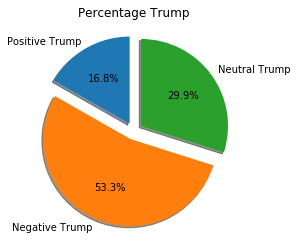

In [18]:
# Comparison between negative comments on both      
labels =  ['Positive Trump', 'Negative Trump', 'Neutral Trump'] 
sizes = [positive_per1, negative_per1, neutral_per1]
explode = (0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Percentage Trump')
plt.show()

[35.4, 66.3, 95.19999999999999]


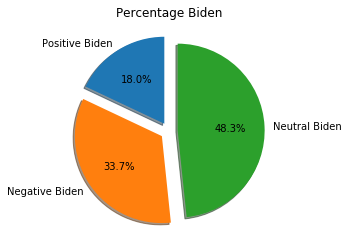

In [19]:
# Comparison between negative comments on both      
labels =  ['Positive Biden', 'Negative Biden', 'Neutral Biden' ] 
sizes = [positive_per2, negative_per2, neutral_per2]
print(sizes)
explode = (0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Percentage Biden')
plt.show()